# Building the K-mer spectra from a genome

Write functions to:
1. Calculate k-mers from DNA sequences. Check it on a sequence with L=33 using k=21. Seq='ATGGACCAGATATAGGGAGAGCCAGGTAGGACA'  How many kmers do you expect from it?
2. Calculate them directly from a FASTA file (example fastas read.fasta and Theileria provided)
3. Adapt the functions in a python program to plot the k-mer spectra of a fasta file. Apply this to a bacterial genome, Klebsiella pneumoniae:GCF_000240185.1_ASM24018v2_genomic.fasta
4. Optional Assignment (via Moodle): write a .py to do this and the plots you get with k=8

Information: 
--------------
A method of visualizing k-mers, the k-mer spectrum, shows the multiplicity of each k-mer in a sequence versus the number of k-mers with that multiplicity (see  https://en.wikipedia.org/wiki/K-mer). This is a sort of density plot, notation varies a bit the x-axis basically shows multiplicity of each kmer (number of time is repeated in the sequences or genome) and the y-axis the number of kmers at a given multiplicity (e.g. how many kmers appear 1,2,3,...100 times in the genome). For these reasons, the y-axis is sometimes called frequency and the x-axis counts by some programs.

In the case of reads, the multiplicity is "amplified" by the sequencing coverage.


In [7]:
'''
Function that extracts the k-mers from a determined sequence of DNA
Parameters: DNA sequence, size of k
'''
def create_kmers(seq, k_size):
    
	kmers = [] # Creating an empty list to store the kmers
	n_k = len(seq) - k_size + 1 # Caalculating the kers that will be generated according to the formula

	# Iteration that goes through all the kmers that will be generated (calculated previously)
	for i in range(n_k):

		kmer = seq[i : i + k_size] # Getting each kmer from the input sequence with a slide window that has a size of k_size
		kmers.append(kmer) # Appending the kmer to the list
    
	
	return kmers # Returning the list kmers

'''
Implementing the create_kmer function
'''

seq = "ATGGACCAGATATAGGGAGAGCCAGGTAGGACA"
k_size = 21

kmers = create_kmers(seq, k_size)

print(kmers)

['ATGGACCAGATATAGGGAGAG', 'TGGACCAGATATAGGGAGAGC', 'GGACCAGATATAGGGAGAGCC', 'GACCAGATATAGGGAGAGCCA', 'ACCAGATATAGGGAGAGCCAG', 'CCAGATATAGGGAGAGCCAGG', 'CAGATATAGGGAGAGCCAGGT', 'AGATATAGGGAGAGCCAGGTA', 'GATATAGGGAGAGCCAGGTAG', 'ATATAGGGAGAGCCAGGTAGG', 'TATAGGGAGAGCCAGGTAGGA', 'ATAGGGAGAGCCAGGTAGGAC', 'TAGGGAGAGCCAGGTAGGACA']


In [8]:
'''
Function that is able to read from a fasta file

Input: path of the file we want to read

Because in our case the file Theileria_2500bp has both upper and lower case we will adapt our function acordingly to it,
we can do so by either converting everything to uppercase or lowercase, in our case we will do upper case
'''

def get_seq(file_path):

    from Bio import SeqIO # Loaidng the library to manage fasta filess

    records = list(SeqIO.parse(file_path, "fasta")) # Reading the fasta file and extracting the sequences into a list

    sequences = [] # Creation of an empty list to store the sequences

    # Iterating through each record of the fasta file
    for rec in records:
        
        seq = rec.seq # Getting the sequence of the current record
        seq = str(seq.upper()) # Formatting the sequence so that everything is in uppercase for easyer handling
        sequences.append(seq) # Appending the formated sequence to the final list of sequences

    return sequences # Returning the list of sequences

'''
Implemementation of the function get_seq
'''

import os # Library that I will use to get the path

file_path = os.getcwd() + "/fasta/Theileria_2500bp.fa"

sequences = get_seq(file_path)

print(sequences)

['TTTTTTTTTTTTTTATTTGCGTTGAAGTATATTTATTCCCTGTAACTCTTGGTTCTTGTGACGTTGTTTATCCTAGAGTTAATCTTTATAGTTTATTGCTTCAGCCTATAGGTTTTGGACTTGTTGTATCTTCTGTATTTCTTGAAGTTGGAAATGGAACTGGATGGACACTGTATCCTCCTCTGTCCACTTCAATTGCTAGCGCTGGAATTGATTTTATTATATTTGGTCTTTTATCTGCTGGAATAGCAAGTACACTAAGTAGCGTAAATTTTATAACAACTTTTACTTCTATTAAGGTTATTGGATTTGTTATAGATAGAATTCTGCCTATTGCTTGGTCAATTGTTTTAACTTCTTTCTTATTGCTTTTATCTTTGCCTGTCGTTACTGCTGTATTTTTGATGGTATTTTTCGACAGACATTATAATACTATGTTTTTTGAATCTTCTAATTCTGGAGATCCTGTATTATATCAACATTTATTTTGGTTTTTTGGACATCCAGAAGTATATATAATGATACTGCCTGGATTTGGTGTAATAAGTTTAATGCTATCTACTTTTGCTACTAAAGAAATGTTTGGAAATCAAACTATGATTTTAGCGATGGGTTCTATAGCTTTGTTAGGATGTTTAGTTTGGGGACATCATATGTACACTTCTGGATTAGAAGCAGACACTAGAGGTTATTTCACTACAGTTACAATACTTATTTCTTTACCAACTGGAAATAAAGTATTTAATTGGGTAACAACTTTACAAGGTGCAACTACAGTTAGAAATATTGGAGTTGTGGTTTTCGGATTTTTATTTGTTATAAATTTTGTAATTGGAGGAACAACTGGAGTTGTTTTAGGTAATGCTGGTGTTGATATAGCTTTACATGATACTGTATATGTTGTTGGACATTTTCATTTTGTATTGTCAATAGGAGCTATAACATCATTGCTATGTTACATAATGTATATTCAAAGAATGTTATATGGTGTTATATTT

In [10]:
def kmers_from_file(file_path, k_size):

    kmers = [] # Creating an empty list to store the kmers

    sequences = get_seq(file_path)  # Using our previously created function to get all the sequences from the fasta file

    # Iterting through each of the sequences
    for seq in sequences:

        sub_kmers = create_kmers(seq, k_size)  # Getting all possible kmers from a sequence
        kmers += sub_kmers # Putting all the sub_kmers into the list with all of them

    return(kmers) # Getting the list with all of the kmers

'''
Implementation of the function kmers_from_file
'''

import os

file_path = os.getcwd() + "/fasta/read.fasta" # Path of the file
k_size = 100

kmers = kmers_from_file(file_path, k_size)

print(kmers)

['CTCACATGATTCTTGCCTGCGGGTTGGGGTAGGAGTCAGAGTCACATGAGACAGATAGTTCGCTCAGAAACTGGGGATAGATCGATCAAAGCCTCGCTTC', 'TCACATGATTCTTGCCTGCGGGTTGGGGTAGGAGTCAGAGTCACATGAGACAGATAGTTCGCTCAGAAACTGGGGATAGATCGATCAAAGCCTCGCTTCA', 'CACATGATTCTTGCCTGCGGGTTGGGGTAGGAGTCAGAGTCACATGAGACAGATAGTTCGCTCAGAAACTGGGGATAGATCGATCAAAGCCTCGCTTCAT', 'ACATGATTCTTGCCTGCGGGTTGGGGTAGGAGTCAGAGTCACATGAGACAGATAGTTCGCTCAGAAACTGGGGATAGATCGATCAAAGCCTCGCTTCATA', 'CATGATTCTTGCCTGCGGGTTGGGGTAGGAGTCAGAGTCACATGAGACAGATAGTTCGCTCAGAAACTGGGGATAGATCGATCAAAGCCTCGCTTCATAT', 'ATGATTCTTGCCTGCGGGTTGGGGTAGGAGTCAGAGTCACATGAGACAGATAGTTCGCTCAGAAACTGGGGATAGATCGATCAAAGCCTCGCTTCATATG', 'TGATTCTTGCCTGCGGGTTGGGGTAGGAGTCAGAGTCACATGAGACAGATAGTTCGCTCAGAAACTGGGGATAGATCGATCAAAGCCTCGCTTCATATGG', 'GATTCTTGCCTGCGGGTTGGGGTAGGAGTCAGAGTCACATGAGACAGATAGTTCGCTCAGAAACTGGGGATAGATCGATCAAAGCCTCGCTTCATATGGC', 'ATTCTTGCCTGCGGGTTGGGGTAGGAGTCAGAGTCACATGAGACAGATAGTTCGCTCAGAAACTGGGGATAGATCGATCAAAGCCTCGCTTCATATGGCT', 'TTCTTGCCTGCGGGTTGGGGTAGGAGTCAGAGTCACATGAGACAGATAGTTCGCTCAGAAAC

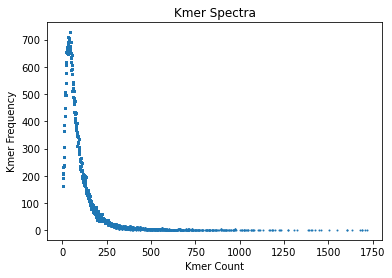

In [17]:
'''
Function to generate a plot from a k-mer Spectra of a determined file



Input: a the path to the file we want to create the k-mer spectra graph and the size k
'''
def kmer_spectra_graph(file_path, k_size):

    kmers = kmers_from_file(file_path, k_size) # Using the function kmers_from_file to get the kmers from a fasta file

    '''
    Getting the multiplicity of each k-mer:
    '''

    mult = {} # Creation of a dictionary to store all the counts for each of the kmer

    # Iterating throuhg all of the k-mer
    for k in kmers:

        k = str(k) # Making k a string

        # Checking if k is in the dictionary multiplicity
        if k in mult.keys():

            mult[k] += 1 # If the previous condition is met we increment te count for a given k-mer

        else:

            mult[k] = 1 # If there is no record of k we create one and assign it's count to 1

    '''
    Creation of the plot
    '''
    # Importing libraries to create the plots
    import pandas as pd
    import matplotlib.pyplot as plt
    
    # Creating the data frame from the dictionary mult
    df = pd.DataFrame(list(mult.items()), columns=['Kmer', 'Counts'])
    
    # Adding a new column "Frequenccy" into the data frame and storing the info of each k-mer with its corresponding count
    df['Frequency'] = df.groupby('Counts')['Kmer'].transform('size')
    
    plt.scatter(x=df['Counts'], y=df['Frequency'], s=1) # Creating a scatter plot of k-mer frequency versus k-mer count
    
    # Names of the axis
    plt.xlabel('Kmer Count')
    plt.ylabel('Kmer Frequency')
    plt.title('Kmer Spectra')

'''
Implementation of the funtion kmer_spectra_graph
'''
import os

file_path = os.getcwd() + "/fasta/GCF_000240185.1_ASM24018v2_genomic.fasta" # Path of the file
k_size = 8

kmer_spectra_graph(file_path, k_size)